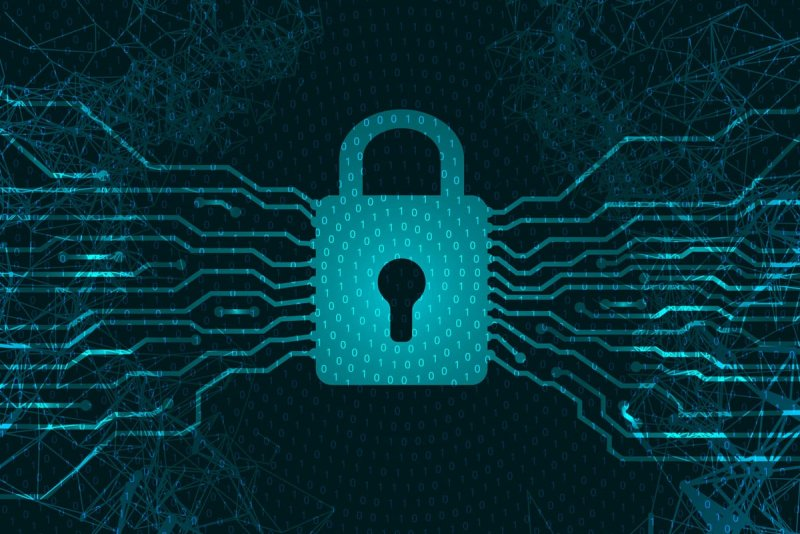

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных 

**_В данном проекте предлагается защитить данные клиентов страховой компании. Для этого нужно разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Также требуется обосновать  корректность его работы._**
 
**_При этом качество моделей машинного обучения не должно ухудшаться._**

**_Подбор наилучшей модели в проекте не требуется._**

**_Задачу будем решать через построение модели Линейной регрессии._**


## Загрузка данных

In [20]:
%%capture --no-display 

#загрузим все необходимые для работы библиотеки и инструменты:

!pip install scikit-learn==1.1.3
!pip install pandas-profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

NJOBS = -1 # для одновременной работы всех ядер процессора при обучении моделей(для увеличения скорости) 

Импорт рабочих датасетов не показан в соответствии с политикой конфиденциальности ЯП

In [3]:
#посмотрим общую инф-ию о данных:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
#посмотрим несколько строк датафрейма
df.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
403,0,32.0,58900.0,2,0
37,0,27.0,38300.0,0,0
1815,1,27.0,38700.0,2,0
3145,0,26.0,40700.0,4,0
4446,0,22.0,36300.0,0,0
4555,0,51.0,43000.0,1,2
401,0,18.0,41400.0,0,0
3177,0,39.0,31500.0,0,0
1216,0,27.0,41800.0,1,0
4196,0,24.0,33800.0,0,0


In [5]:
#посмотрим описание всех признаков
df.describe(include='all')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


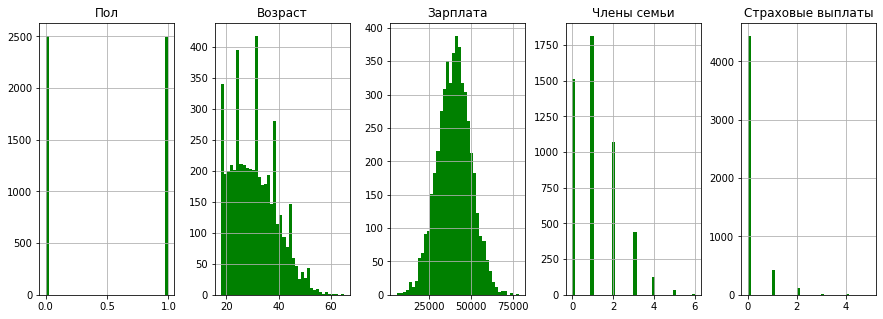

In [6]:
# построим гистограммы распределения числовых столбцов:
df.hist(figsize=(15, 5), color='green', bins=40, layout=(1, 5));


**Вывод:**

- **Из вышеперечисленного видим, что в данных все признаки - числовые по типу, но есть один категориальный по сути - это признак "Пол", представленный 0 и 1.** 

- **В данных нет однозначных идентификаторов клиента типа ФИО или id, поэтому нет смысла искать явные дубликаты.**
- **В данных нет пропущенных значений.**

- **Распределение признака "Зарплата" приближено к нормальному, без особых выбросов**

- **Распределение признака "Возраст" имеет выбросы, на которые следовало бы обратить повышенное внимание, например в задаче при поиске наилучшей модели. Но данный кейс - это задача шифрования, следовательно можно оставить, как есть.**

- **Пол клиентов распределен равномерно.**

- **Страховые выплаты клиентам почти не проводились.**


## Умножение матриц

In [7]:
#разделим выборку на обучающую и тестовую:

features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.75, random_state = 12345)

print(f'Размер обучающей выборки: {X_train.shape[0]/len(df):.0%}')
print(f'Размер тестовойй выборки: {X_test.shape[0]/len(df):.0%}')

Размер обучающей выборки: 75%
Размер тестовойй выборки: 25%


In [8]:
#приведем признаки к одинаковому масштабу:

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Решим задачу об умножении матриц:**


Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $N$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Необходимо:**

Ответить на вопрос и обосновать решение: при умножении признаков на обратимую матрицу, изменится ли качество линейной регрессии?<br>
(Её можно обучить заново)
- a) Изменится. Привести примеры матриц.
- b) Не изменится. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Решение:**

В формуле расчета весов(обучения) Лин.регрессии вместо исходной матрицы $X$, применим произведение $XN$, где $N$ - произвольная обратимая матрица. 

Обратимая матрицы обладает свойствами:
- она является квадратной.
- существует матрица, обратная заданной.
- произведение матрицу на обратную дает единичную матрицу.

Таким образом, новые коэффициенты $w$:

$$
w = ((X N)^T X N)^{-1} (X N)^T y
$$


В скобках первое произведение $ (XN)^T $ по правилу транспонирования матриц, будет выглядеть следующим образом:

$$
(XN)^T = N^T X^T
$$

$$
w = (N^T X^T X N)^{-1} N^T X^T y
$$

Перегруппируем множители в скобках:

$$
w = (N^T (X^T X) N)^{-1} N^T X^T y
$$

Преобразуем обратную матрицу произведения по правилу умножения обратных матриц:

$$
(N^T (X^T X) N)^{-1} = ((X^T X) N)^{-1} (N^T)^{-1}
$$

След. шаг:

$$
((X^T X) N)^{-1} (N^T)^{-1} = N^{-1} (X^T X)^{-1} (N^T)^{-1}
$$

Подставим веса в формулу:

$$
w = N^{-1} (X^T X)^{-1} (N^T)^{-1} N^T X^T y
$$

Согласно свойствам обратимой матрицы, произведение $(N^T)^{-1} N^T$ равно единичной матрице $E$.<br>
Поэтому:

$$
w = N^{-1} (X^T X)^{-1} E X^T y = N^{-1} (X^T X)^{-1} X^T y
$$


В результате получили формулу исходных весов обучения:  $w = (X^T X)^{-1} X^T y$.

Новые веса обозначим как $w1$ :

$$
w1 = N^{-1} w
$$

При подстановке пересчитанных значений весов  𝑤1 в формулу для предсказаний линейной регрессии $a = Xw$:

Получим новые предсказания $a1$:

$$
a1 = (XN) w1 = X N N^{-1} w
$$

При обратимости $N$ , произведение $N N^{-1}$ равно единичной матрице $E$:

$$
a1 = X N N^{-1} w = X E w = X w = a
$$



Таким образом, предсказания $a1$ для признаковой матрицы, умноженные на обратимую матрицу $N$ равны предсказаниям $a$.

**Ответ:** 

- правильный ответ b. - Качество Линейной регресии НЕ ИЗМЕНИТСЯ при умножении признаков на обратимую матрицу.
- также мы показали, что предсказания $a = a1$ остаются прежними, и это позволит смело шифровать персональные данные.
- но т.к. вектор весов изменится $w1 = N^{-1} w$, необходимо будет переучивать модель на новых закодированных трейн-признаках.

## Алгоритм преобразования

**Словесное описание алгоритма:**

 1) Генерируем рандомную квадратную матрицу методом `np.random.rand`.
 
 2) Проверяем сгенерированную матрицу на обратимость.
 
 3) Добавляем в трейновую и тестовую выборки признаков единичные столбцы.
 
 4) Применяем формулу расчета весов **$w = (X^T X)^{-1} X^T y$** для исходной матрицы.
 
 5) Применяем формулу расчета предсказаний $a = Xw$ для исходной матрицы.
 
 6) Применяем формулу расчета весов к матрице, домноженной на обратимую $N$ по формуле $w = ((X N)^T X N)^{-1} (X N)^T y$.
 
 7) Вычисляем предсказания для измененной матрицы.
 
 8) Сравниваем предсказания на первоначальной и преобразованной матрицах методм `np.isclose()`.
 
 9) Создаем 2 модели Линейной регрессии.
 
 10) При обучении используем соответствующие векторы фич.
 
 11) Делаем предсказания.
 
 12) Считаем `r2_score` каждой модели и сравниваем их.
 
 13) Сравниваем предсказания моделей методом`np.isclose()`.


**Вывод:**
 - **В словесном виде описали алгоритм преобразования, который реализован в П.4.**

## Проверка алгоритма

In [9]:
#сгенерируем рандомную квадратную матрицу:

add_matrix = np.random.rand(features.shape[1]+1, features.shape[1]+1)
add_matrix

array([[0.61121459, 0.2205594 , 0.41373968, 0.94153473, 0.32457871],
       [0.22737437, 0.37843673, 0.72526364, 0.98629351, 0.78254102],
       [0.17968231, 0.8398888 , 0.24320116, 0.78621771, 0.33058853],
       [0.42176017, 0.29182657, 0.09769055, 0.63933122, 0.02226872],
       [0.66704895, 0.52539998, 0.56380691, 0.64785011, 0.77905554]])

In [10]:
#проверим матрицу на обратимость, домножив на обратную, в результате должна получится E:

add_matrix_inv = np.linalg.inv(add_matrix)
np.round(add_matrix @ add_matrix_inv, 2)

array([[ 1.,  0., -0.,  0.,  0.],
       [ 0.,  1., -0., -0., -0.],
       [ 0.,  0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  1., -0.],
       [-0., -0., -0.,  0.,  1.]])

In [11]:
#добавим в трейновую и тестовую выборки единичный столбец:

X_train_new = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)

X_test_new = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

print(X_train_new.shape[1], X_test_new.shape[1])

5 5


Применим формулу расчета весов **$w = (X^T X)^{-1} X^T y$** для исходной матрицы:

In [12]:
w = np.linalg.inv(X_train_new.T @ X_train_new) @ X_train_new.T @ y_train
w


array([ 0.14933333,  0.00896098,  0.30200391, -0.00539004, -0.01380187])

Применим формулу расчета предсказаний $a = Xw$ для исходной матрицы: 

In [13]:
predictions = X_train_new @ w
predictions

array([ 0.58948687,  0.26891566,  0.17593453, ...,  0.51340021,
       -0.22406374, -0.27567978])

То же для матрицы, домноженной на обратимую $N$ по формуле $w = ((X N)^T X N)^{-1} (X N)^T y$:

In [14]:
w1 = np.linalg.inv((X_train_new @ add_matrix).T @ (X_train_new @ add_matrix)) @ (X_train_new @ add_matrix).T @ y_train
w1

array([  1.16502098,   5.59983148,  21.49651531,  -6.08523171,
       -15.28856995])

In [15]:
#предсказания для матрицы, домноженной на обратимую:
predictions_1 = X_train_new @ add_matrix @ w1
predictions_1 

array([ 0.58948687,  0.26891566,  0.17593453, ...,  0.51340021,
       -0.22406374, -0.27567978])

In [16]:
#проверим совпадение предсказаний в случае исходной и преобразованной матриц:
np.isclose(predictions, predictions_1).mean()

1.0

**Проверим работу алгоритма, обучив две модели Линейной регрессии:**

In [17]:
lr = LinearRegression(n_jobs=NJOBS)
lr_1 = LinearRegression(n_jobs=NJOBS)

In [18]:
#модель для первоначальной матрицы:
lr.fit(X_train, y_train)
predictions_test = lr.predict(X_test)

#модель для измененной матрицы:
lr_1.fit(X_train_new @ add_matrix, y_train)
predictions_1_test = lr_1.predict(X_test_new @ add_matrix)

#найдем r2_score для отображения их качества:
print('r2_score модели lr =', r2_score(y_test, predictions_test))
print('r2_score модели lr_1 =', r2_score(y_test, predictions_1_test))

r2_score модели lr = 0.4352275712702667
r2_score модели lr_1 = 0.4352231945849169


In [19]:
#также сравним значения предсказаний:
np.isclose(predictions_1_test, predictions_test).mean()

0.0144

**Вывод:**
- **Реализован алгоритм шифрования при обучении моделей.**
- **r2_score обеих моделей почти одинаков.**
- **а также одинаковы предсказания.**

## Общий вывод


- **В результате работы над проектом были загружены и изучены данные о клиентах страховой компании.**

- **Была проведена предобработка данных и разделение их на выборки, трейновую и тестовую.**

- **Методом scaler() масштаб всех числовых признаков отнормирован, что очень важно при использовании их в Линейных моделях.**

- **Было доказана формула об умножении матриц на рандомную обратимую, что при этом редсказания не изменяются.**

- **Словесно был описан алгоритм дальнейшей работы с данными.**

- **Алгоритм был успешно применен на практике, при обучении моделей Линейной регрессии.**

- **Сравнение их качества (r2_score) на тестовых выборках показало идентичность.**

- **Метод шифрования данных, посредством домнажения их на рандомную обратимую матрицу может применяться для защиты данных клиентов, не ухудшая при этом качества предсказательной Ллинейной модели регрессии.**